In [5]:
import nibabel as nib
import nibabel.processing as ps
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import cv2

In [6]:
def save_img(idata, filepath, affine):
    transposed = idata.astype('float32')
    final_img = nib.Nifti1Image(transposed, affine)
    nib.save(final_img, filepath)

In [7]:
def show_slices(img):
    #img = np.transpose(img, [2,1,0])
    w, h, l = img.shape
    
    slices = [img[w//2,:,:], img[:,h//2,:], img[:,:,l//2]]
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice,cmap='gray',origin='lower')

In [50]:
def open(img, e, d, iterations = 1):
    kernalE = np.ones((e, e))
    kernalD = np.ones((d, d))
    
    x, y, z = np.shape(img)
    
    img_x = np.zeros([y, z])
    img_y = np.zeros([x, z])
    img_z = np.zeros([x, y])
    
    imgx = np.zeros([x, y, z])
    imgy = np.zeros([x, y, z])
    imgz = np.zeros([x, y, z])
    
    for i in range(x):
        img_x[:, :] = img[i, :, :]
        img_x = cv2.erode(img_x, kernalE, iterations)
        img_x = cv2.dilate(img_x, kernalD, iterations)
        imgx[i, :, :] = img_x[:, :]
        
    for j in range(y):
        img_y[:, :] = img[:, j, :]
        img_y = cv2.erode(img_y, kernalE, iterations)
        img_y = cv2.dilate(img_y, kernalD, iterations)
        imgy[:, j, :] = img_y[:, :]
        
    for k in range(z):
        img_z[:, :] = img[:, :, k]
        img_z = cv2.erode(img_z, kernalE, iterations)
        img_z = cv2.dilate(img_z, kernalD, iterations)
        imgz[:, :, k] = img_z[:, :]
        
    img = np.logical_or(imgx, imgy, imgz)
    
    return img
        

In [48]:
A = np.zeros([10, 10, 10])
A[2:8, 2:8] = 1
# print A

B = open(A, 3, 2)
print B


[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0

In [16]:
img = nib.load("/home/shzhou/Desktop/data/train_HaN_OAR/4/seg.nii.gz").get_data()
x, y, z = np.shape(img)
# show_slices(img)
print (x, y, z)

img_x = np.zeros([y, z])
img_x[:, :] = img[1, :, :]
print img_x

    

(512, 512, 124)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
A = np.zeros([4, 4])
B = np.ones([4, 4])
D = np.ones([4, 4])
C = np.zeros([4, 4])
# C[:, :] = A[:, :] | B[:, :]
C = np.logical_or(A, B, D)
# C.astype(int)
# C = A | B
C = C + 0
print C

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


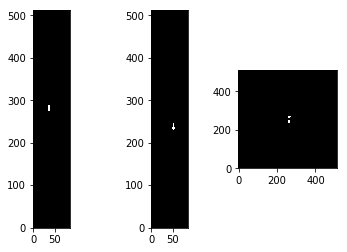

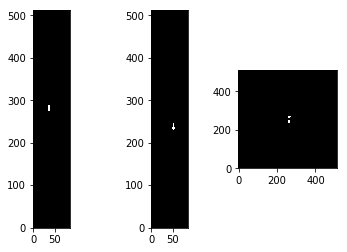

In [56]:
img = nib.load("/home/shzhou/Desktop/data/Lung_GTV/4/label.nii.gz").get_data()
show_slices(img)
img = open(img, 1, 1)
show_slices(img)